## Part I - Exploratory Analysis of Prosper Loan Dataset
## by Henry Ime Mbom

## Introduction.

> This dataset contains the customer's data from a loan company known as Prosper. This dataset comprises of 113,937 observation with 81 Features on each loan which includes loan amount, borrower rate, current loan status, borrower income, Prosper score, etc.
The dataset was downloaded from : 
https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Preliminary Wrangling

In [2]:
# Loading of the dataset and inspecting it on a high level
loan_data = pd.read_csv('prosperLoanData.csv')
print(loan_data.shape)
print(loan_data.info())
loan_data.head()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The dataset is made up of 113937 observations of 81 variables. From inspection,the datatypes of the variables of the dataset is made up of int, float, boolean and object datatypes.

### What is/are the main feature(s) of interest in your dataset?

> I am primarily interested in the BorrowerRate(interest rate) and Borrower's Annual Percentage Rate(APR) of the loan.As a result, I created visulizations these features
and found that they lie in the range 0.0 to 0.4. I also found from research that APR is either equal to or greater in value than the Interest rate as it incorporate charges and loan fees (Money Crashers, LLC., 2023. Available at: https://www.moneycrashers.com/factors-affect-personal-loan-interest-rate/)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> According to Money Crashers (2023), nine factors that may affect personal loan interest rate include credit score, debt-to-income ratio,employment status, education, loan term, loan principal, collateral, loan purpose and benchmark rates. So for investigating the borrower's Interest rate and APR, I included features such as ProperScore, Occupation, CreditGrade,AvailableBankcardCredit, StatedMonthlyIncome, MonthlyLoanPayment,EmploymentStatus, Occupation and LoanStatus.

### What is the shape and summary statistics of the variables of interest?  
* BorrowerAPR is found to contain 25 null values.

In [3]:
# Performing summary statistics 
loan_data.BorrowerRate.describe()
loan_data.BorrowerAPR.isnull().sum()


25

### What is the distributions of both varaibles of interest using a histogram?

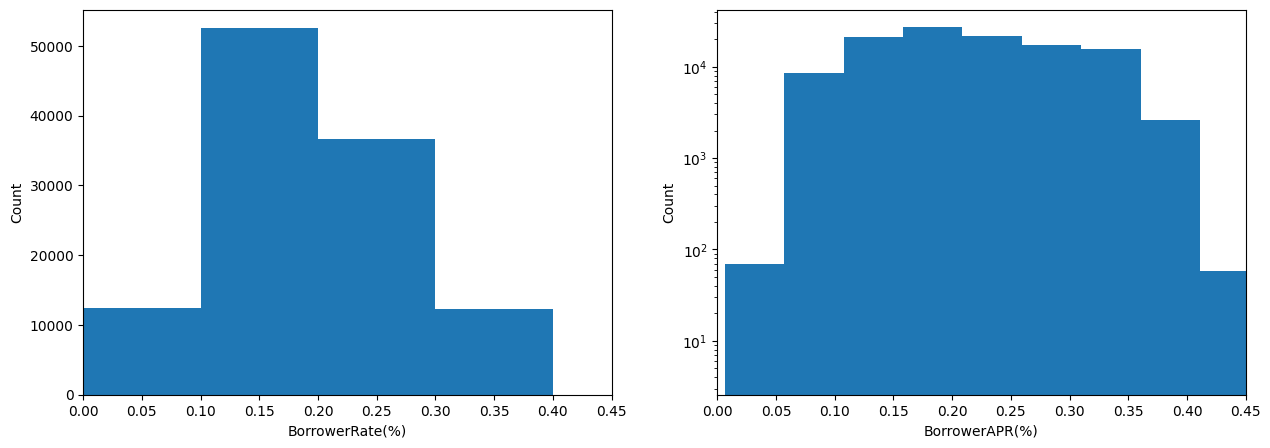

In [41]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [15, 5]) 
# histogram on left
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0,loan_data.BorrowerRate.max()+ 0.2,0.1)
plt.hist(data = loan_data, x = 'BorrowerRate', bins= bins);
plt.xlabel('BorrowerRate(%)')
plt.xlim((0,0.45))
plt.ylabel('Count')

# histogram on right
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, loan_data.BorrowerAPR.max()+0.2,0.1)
plt.hist(data = loan_data, x = 'BorrowerAPR');
plt.xlabel('BorrowerAPR(%)')
plt.xlim((0,0.45))
plt.yscale('log')
plt.ylabel('Count');

#### Both variables are unimodal in nature.initially the count of BorrowerAPR values between 0.00 and 0.05 appears to be nearly zero when plotted on a histogram compared to the count of BorrowerRate which is above 10000 in this range.Transforming the count axis to a log scale reveals more about the count of BorrowerAPR in the range 0.00 to 0.05. In addition, BorrowerAPR variable was observed to contain 25 missing value programmatically.

In [5]:
loan_data.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### What is the distribution of counts of the EmploymentStatus variable?

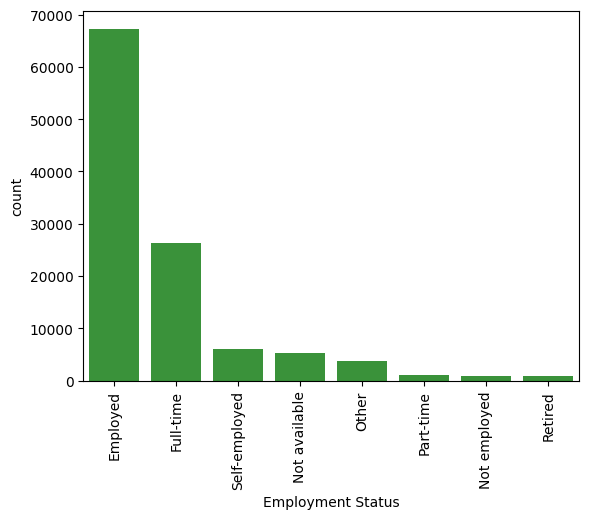

In [6]:
def plotting_bar(series, label):
    label = label
    base_color = sb.color_palette()[2]
    loan_order = series.value_counts().index
    sb.countplot(data=loan_data, x = label, color = base_color,order=loan_order);
    
plotting_bar(loan_data.EmploymentStatus, 'EmploymentStatus')
plt.xticks(rotation = 90);
plt.xlabel('Employment Status');

#### The number of Employed borrowers in the dataset is above 60000. This is reseasonable as it comprises of Full-time, self employed , part time and other category. The full time borrowers are more than the self employed borrowers; with the least being the part time borrowers. The numbers of unemployed and retired borrowers however are very minimal.

### What is the distribution of counts of the ProsperScore?

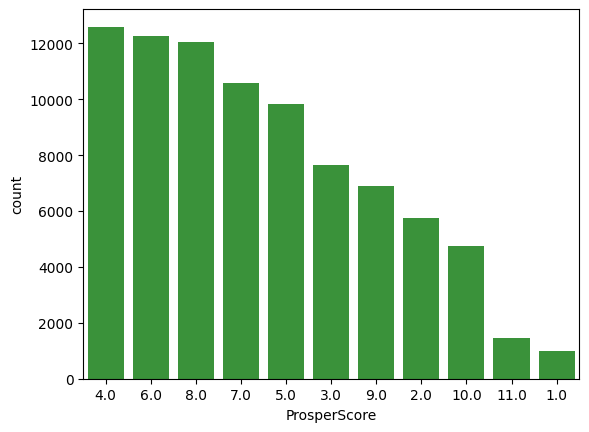

In [46]:
plotting_bar(loan_data.ProsperScore, 'ProsperScore')

#Logic to print value on each bar.

#### The ProsperScore with the highest frequency is 4.0 which is less than half of the best score(10.0). The least frequency ProsperScore is 1.0. ProsperScore of 11.0 suggests an unusual value or an outlier since the ProsperScore lie between 0.0 to 10.0 based on the data description 

### What is the distribution of count for CreditGrade?

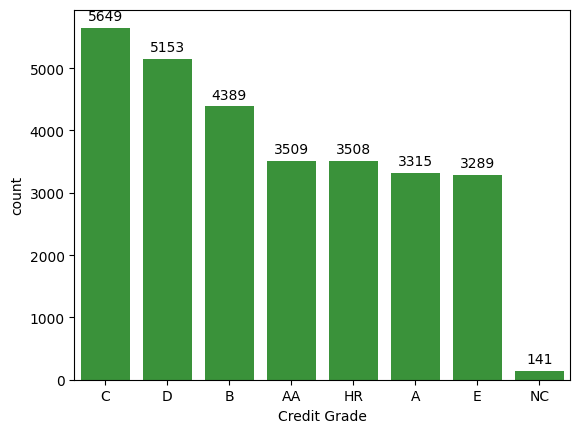

In [8]:
plotting_bar(loan_data.CreditGrade,'CreditGrade')
plt.xlabel('Credit Grade')

# Logic to print value on each bar.
n_counts = loan_data.CreditGrade.value_counts()
for i in range (n_counts.shape[0]):
    count = n_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

#### The highest credit rating count was C followed by D and then B. Credit ratings AA and HR had almost the same counts; same with rating A and E. Credit rating NC had the least count.

### What is the distribution of StatedMonthlyIncome variable?

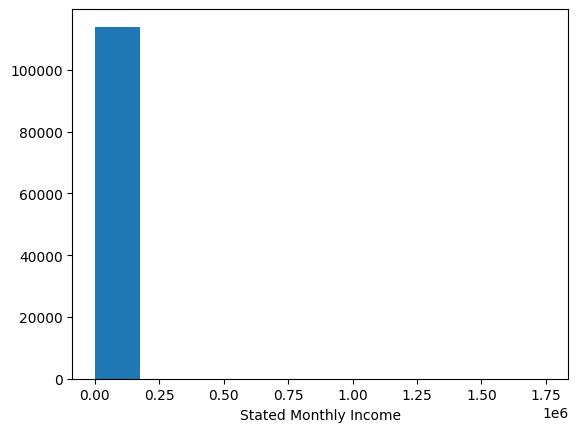

In [9]:
# Plotting the stated monthly income variable
plt.hist(data = loan_data, x = 'StatedMonthlyIncome');
plt.xlabel('Stated Monthly Income');

In [10]:
# Describing and sorting the loan dataset by stated monthly income
loan_data.describe()
loan_dataTrim=loan_data.sort_values(by = 'StatedMonthlyIncome', ascending=False).reset_index(drop = True )
loan_dataTrim.StatedMonthlyIncome.head()

0    1.750003e+06
1    6.185478e+05
2    4.833333e+05
3    4.666667e+05
4    4.166667e+05
Name: StatedMonthlyIncome, dtype: float64

In [11]:
# looking for the value of 1% of the sorted dataset
loan_dataTrim.shape[0]*0.01

1139.3700000000001

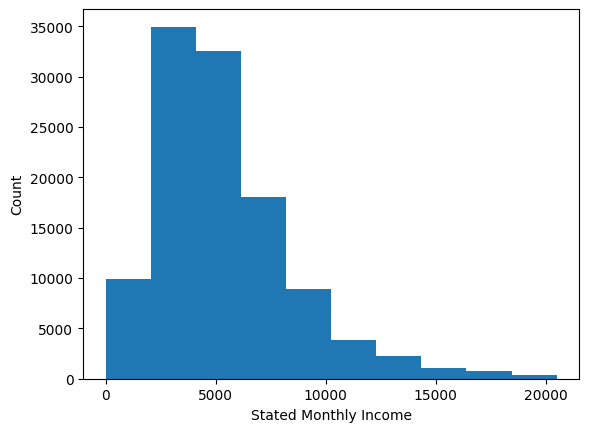

In [12]:
# Removing 1% of the dataset and plotting the trimmed dataset
loan_dataTrim.drop(loan_dataTrim.iloc[0:1141].index,inplace=True)
plt.hist(data = loan_dataTrim, x = 'StatedMonthlyIncome');
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');

#### The histogram plot of the original data is highly driven to the left of the axis.Using summary statistics I figured out the maximum  count value to be 1750000, which could have caused an outlier or error in the plot. So I created a second visualization where the top 1% of the data were dropped from the original dataset and obtained  a more reasonable plot.

### What is the distribution of Occupation variable?

In [13]:
# Investigating the count of each unique values in occupational variable
loan_data.Occupation.value_counts();

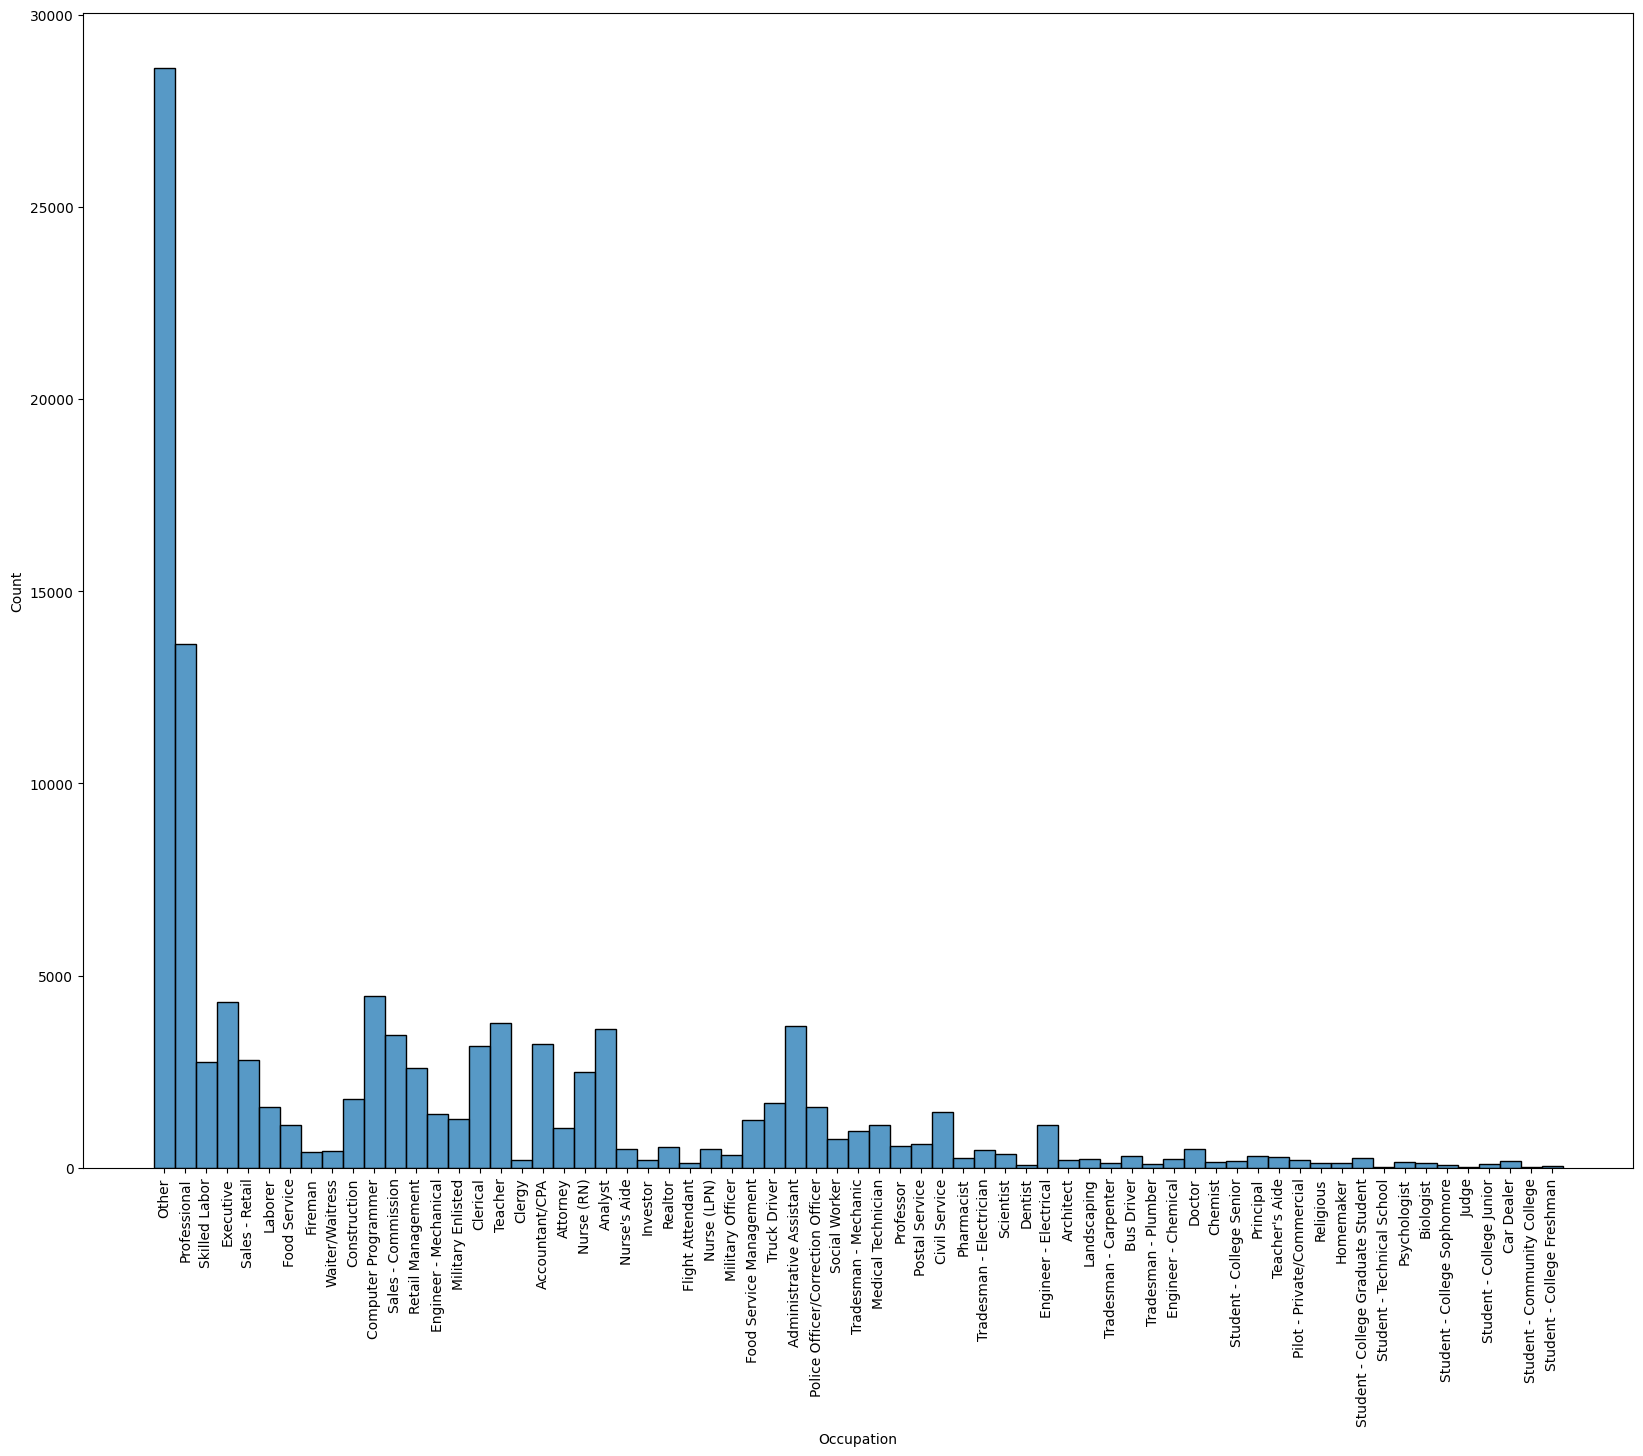

In [14]:
# Plotting the distribution of the Occupation variable
plt.figure(figsize = [20, 15])
sb.histplot(loan_data.Occupation,binwidth = 5 )
plt.xticks(rotation = 90);

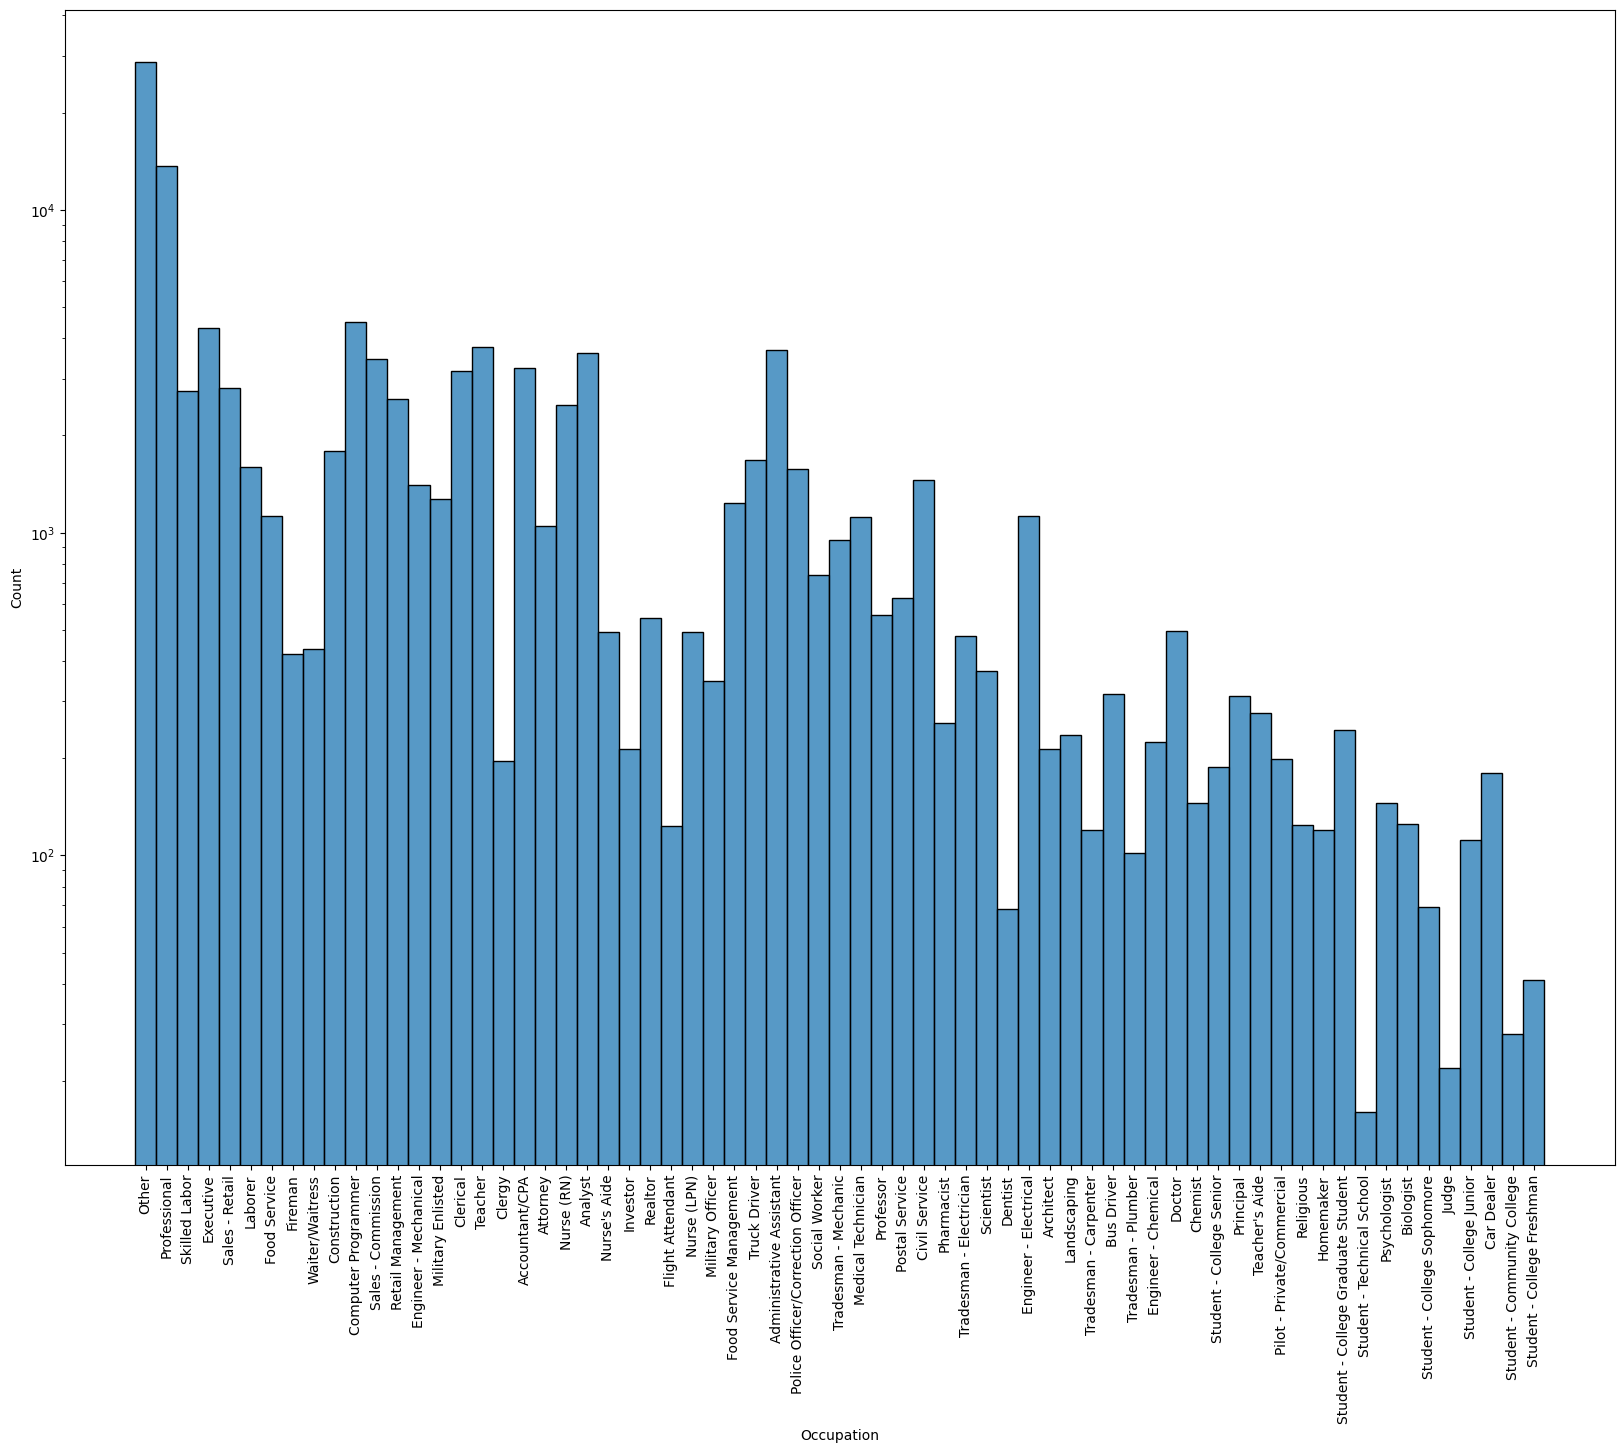

In [15]:
# Plotting the transformed occupation variable
plt.figure(figsize =[20,15])
#count_order = loan_data.Occupation.value_counts().index
sb.histplot(loan_data.Occupation,binwidth =5)
plt.yscale('log')
plt.xticks(rotation = 90);

#### The first plot for count of occupation variable didn't reveal much about majority of the occupation variables aside those in the other and professional category.To mke these variables changes visible, I transformed the y axis of the histplot to a logarithmic scale. From the histogram I found the top five occupation counts to be order, professional, computer programmer, teacher, analyst and administative assistant


### What is the distribution of MonthlyLoanPayment variable?

In [16]:
#inspecting the shape of MonthlyLoanPayment
loan_data.MonthlyLoanPayment.shape[0]

113937

In [17]:
# Sampling 20000 records from the dataset.
np.random.seed(2018)
sample = np.random.choice(loan_data.shape[0],20000,replace=False)
loan_data_subset = loan_data.iloc[sample]
loan_data_subset.shape

(20000, 81)

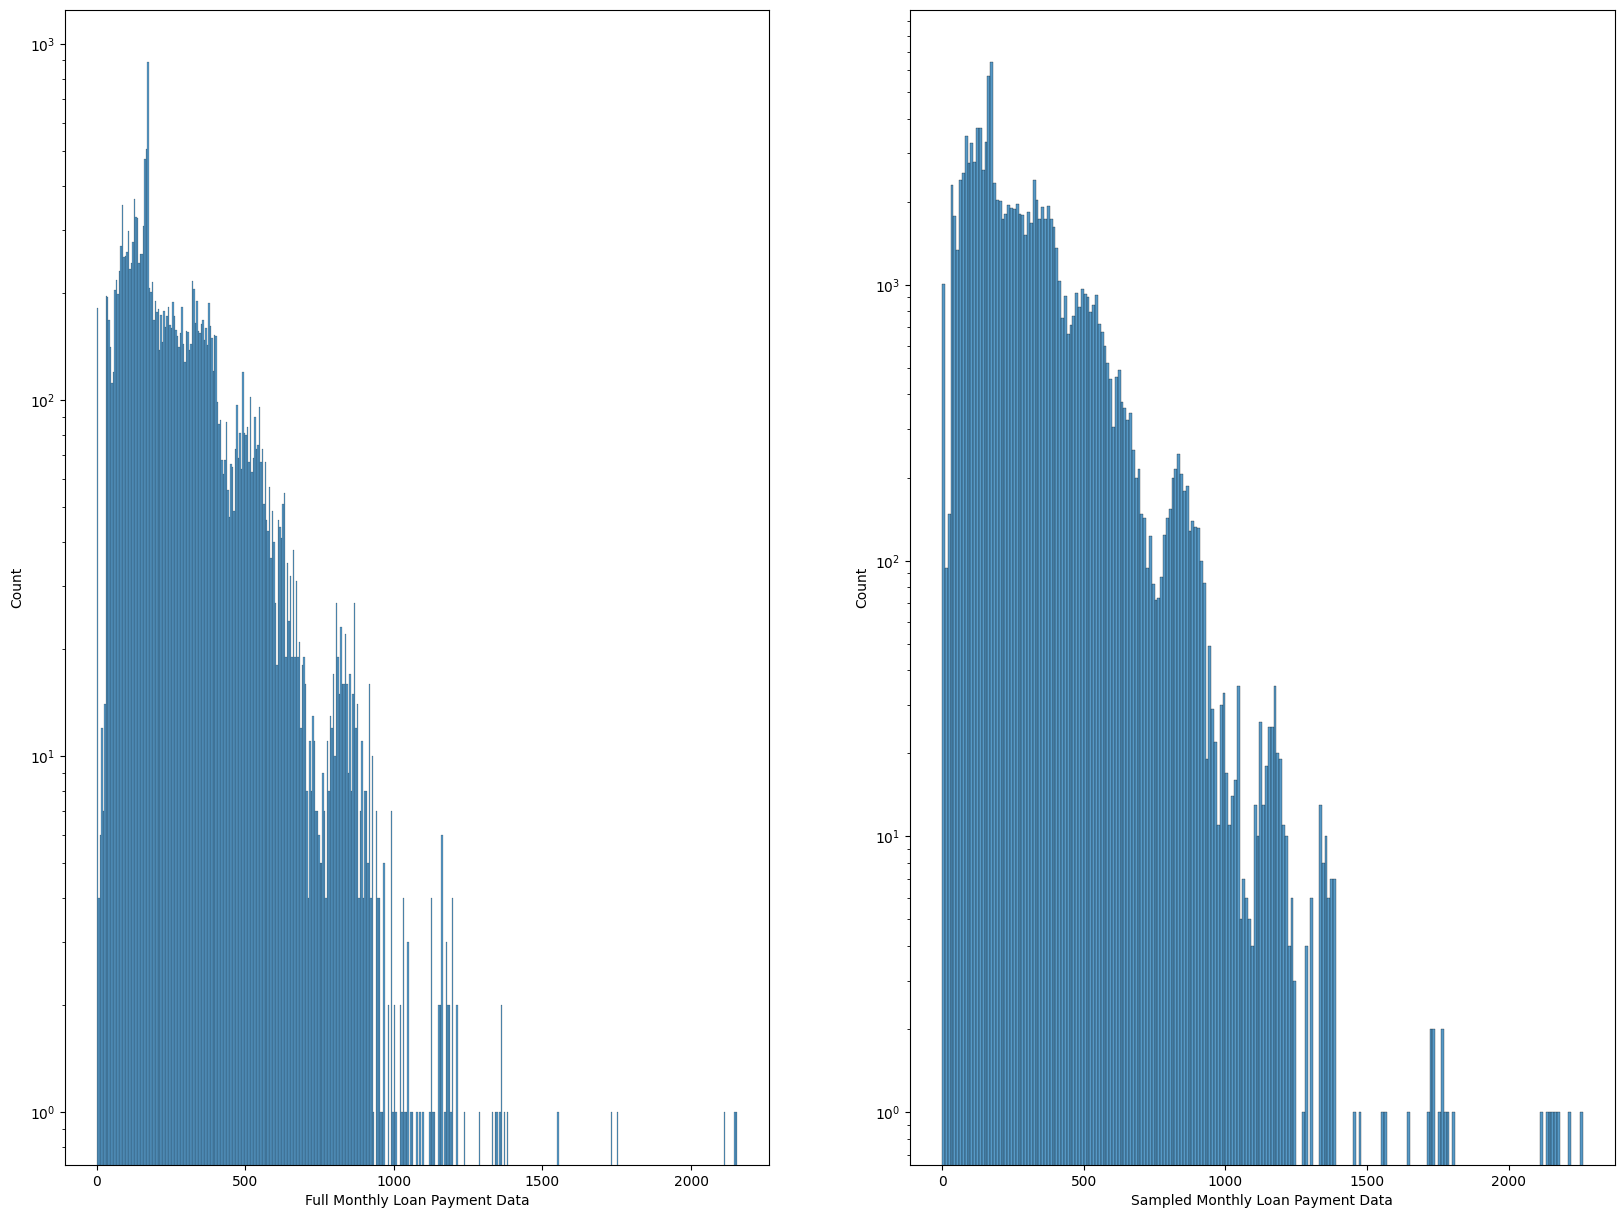

In [18]:
# plotting the original monthly payment variable and the sampled version side by side

plt.figure(figsize =[20,15])
#count_order = loan_data.Occupation.value_counts().index.

plt.subplot(1,2,1)
sb.histplot(loan_data_subset.MonthlyLoanPayment, binwidth =5)
plt.yscale('log')
plt.xlabel('Full Monthly Loan Payment Data')
#plt.xlim((0,2000))

plt.subplot(1,2,2)
sb.histplot(loan_data.MonthlyLoanPayment, binwidth= 10)
plt.xlabel('Sampled Monthly Loan Payment Data')
plt.yscale('log');

#### From both the original and log transformed histplot I found that most of Prosper loan are less than about 1,250 dollars which indicates the prospers services are mainly on personal loans 

### What is the distribution of the ListingCategory variable?

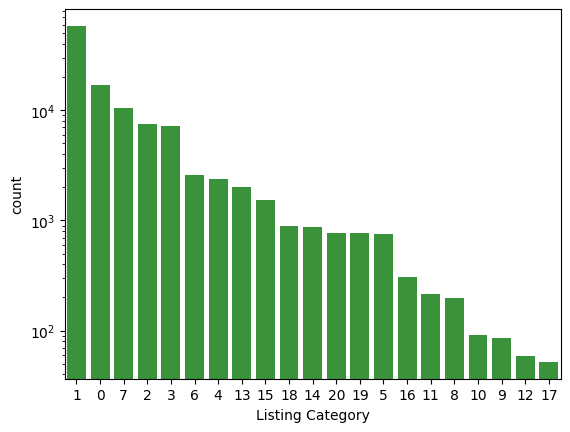

In [19]:
#Renaming the listing variable column from ListingCategory (numeric) to ListingCategory
loan_data.rename(columns = { 'ListingCategory (numeric)' : 'ListingCategory'},inplace = True)
plotting_bar(loan_data.ListingCategory, 'ListingCategory')
plt.yscale('log');
plt.xlabel('Listing Category');

#### The category of listings are encoded using numeric values. The meanings of each encoding can be found in th dataset description file.From the barplot, I found that the most popular services offered by Prosper were Debt Consolidation, other, Home Improvement, and Business.


### What is the ditribution of the AvailableBankcardCredit variable

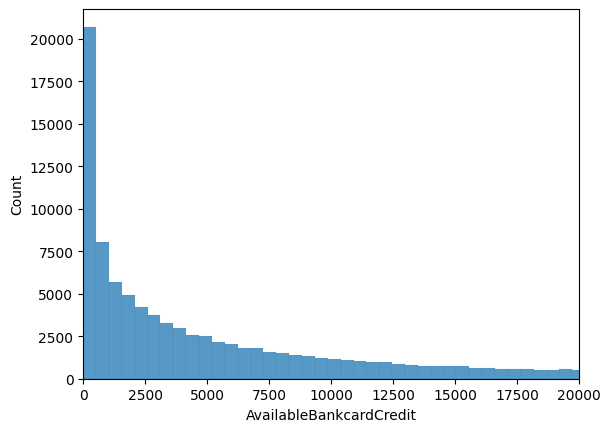

In [20]:
sb.histplot(loan_data.AvailableBankcardCredit)
plt.xlim((0,20000));

#### The histplot shows that borrowers with zero or very little bank credit had the highest count as at when their profiles were pulled. This followed an exponential trend and levels up at about 15000. The distribution is also rightly skewed.

### What is the distribution of the ListingCreationDate variable?

In [21]:
loan_data.ListingCreationDate = pd.to_datetime(loan_data.ListingCreationDate.apply(lambda x:x.split()[0]))

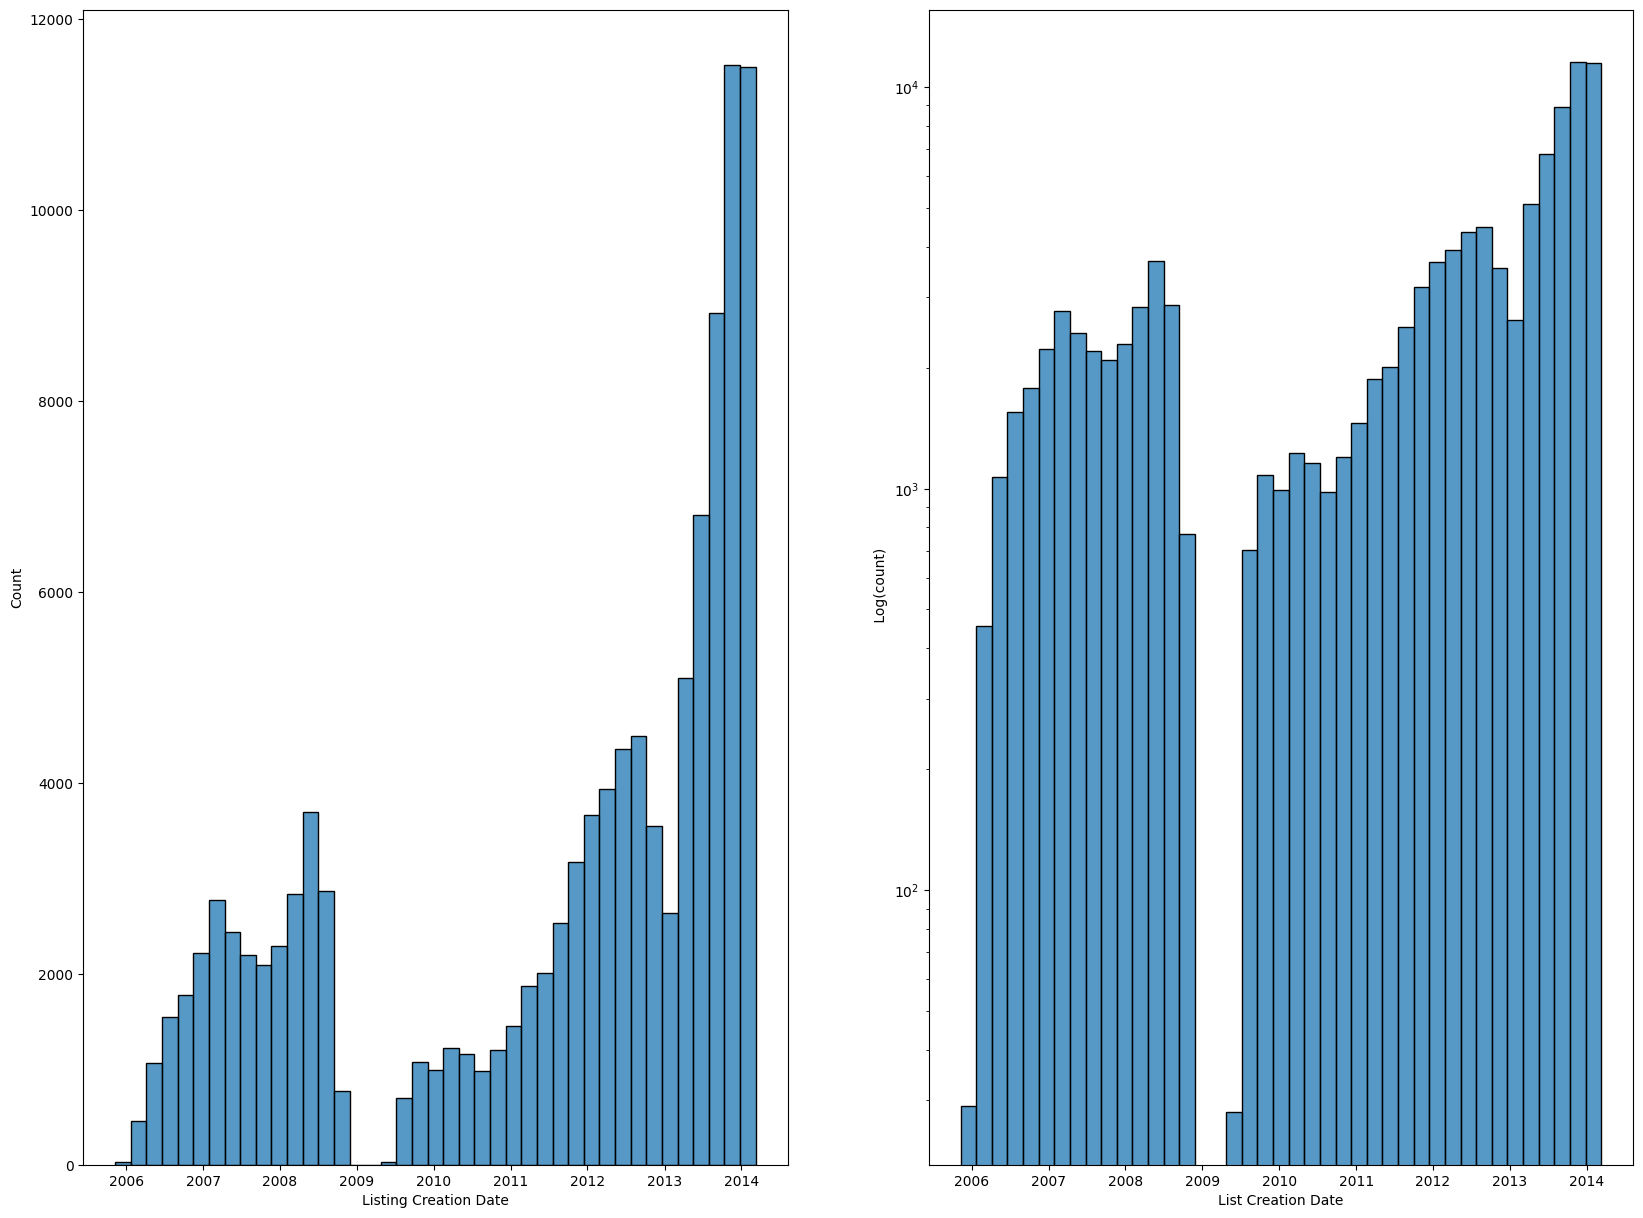

In [22]:
plt.figure(figsize = [20,15])

plt.subplot(1,2,1)
sb.histplot(loan_data.ListingCreationDate)
plt.xlabel('Listing Creation Date')

plt.subplot(1,2,2)
sb.histplot(loan_data.ListingCreationDate)
plt.xlabel('List Creation Date')
plt.yscale('log') 
plt.ylabel(' Log(count)');

#### From both the original and log transformed hisplots, I discovered that count dates for listing creation was highest in 2014. No listing was made in 2019.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### The count of BorrowerAPR values between 0.00 and 0.05 appears to be nearly zero when plotted on a histogram compared to that of BorrowerRate which is above 10000 in this range.But transforming the count axis to a log scale reveal more about the count of BorrowerAPR in this range. BorrowerAPR variable observed to contain 25 missing value programmatically.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

####  The hisplot of the StandardMonthlyIncome variable is highly driven to the left of the axis.Using summary statistics I figured out the maximum count value to be 1750000, which could have caused an outlier or error in the plot. So I created a second visualization where the top 1% of the data were dropped from the original dataset inorder to obtained a more reasonable plot. 
#### I also converted the ListingCreationDate variable to a  datetime object in the format  ‘yyyy-mm-dd’ to indicate the loan listing creation dates.

####  The column name of the ListingCategory varaible was changed from 'Listing category (numeric)' to a simple and easily accessible name: ListingCategory. 

## Bivariate Exploration

In [23]:
loan_dataTrim.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.127960e+05,112796.000000,112773.000000,112796.000000,112796.000000,83947.000000,83947.000000,83947.000000,83947.000000,83947.000000,...,112796.000000,112796.000000,112796.000000,112796.000000,112796.000000,112796.000000,112796.000000,112796.000000,112796.000000,112796.000000
mean,6.274647e+05,40.834427,0.219141,0.193067,0.182999,0.168909,0.080494,0.096164,4.064946,5.940427,...,-54.334096,-14.259346,699.002889,679.836494,25.246107,0.998623,0.048344,0.023476,16.252241,79.962463
std,3.280499e+05,10.435737,0.080343,0.074805,0.074506,0.068477,0.046775,0.030382,1.673032,2.373161,...,60.177568,109.169696,2374.510065,2342.832028,275.082781,0.017637,0.333740,0.232892,288.754547,102.410394
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.181600,0.004900,-0.181600,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,3.999670e+05,36.000000,0.156530,0.134700,0.124900,0.116600,0.042400,0.074630,3.000000,4.000000,...,-72.650000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.001680e+05,36.000000,0.210250,0.184000,0.174000,0.161620,0.072400,0.092110,4.000000,6.000000,...,-34.240000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.918575e+05,36.000000,0.283860,0.250600,0.240600,0.224300,0.112000,0.116800,5.000000,8.000000,...,-13.850000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,114.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the relationship between borrower' rate and Borrower's APR?

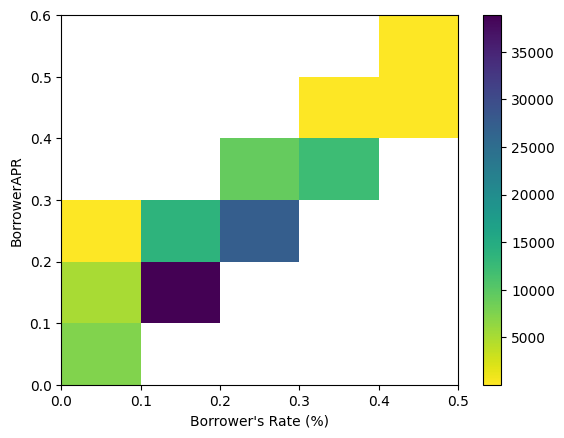

In [24]:
loan_data.head()
def plotting_heat():
  # data setup.
  loan_dataTrim=loan_data.sort_values(by = 'StatedMonthlyIncome',ascending = False).reset_index(drop=True)
  bins_x = np.arange(0, loan_data.BorrowerRate.max()+0.1, 0.1)
  bins_y = np.arange(0, loan_data.BorrowerAPR.max()+0.1, 0.1)
  plt.hist2d(data = loan_data, x = 'BorrowerRate', y = 'BorrowerAPR',
  bins = [bins_x, bins_y], cmap = 'viridis_r', cmin=0.5)
  plt.colorbar()
  plt.xlabel("Borrower's Rate (%)")
  #plt.yscale('log')
  plt.ylabel('BorrowerAPR')

plotting_heat()

#### I used a heat map to show the relationship between Borrower's rate and APR. For both varaibles, the number of datapoint counts is highest where both variable intersect in the range 0.1 to 0.2. This shows great correlation in this between the variables in this range.

### What is the relationship between StatedMonthlyIncome and Borrower's rate?

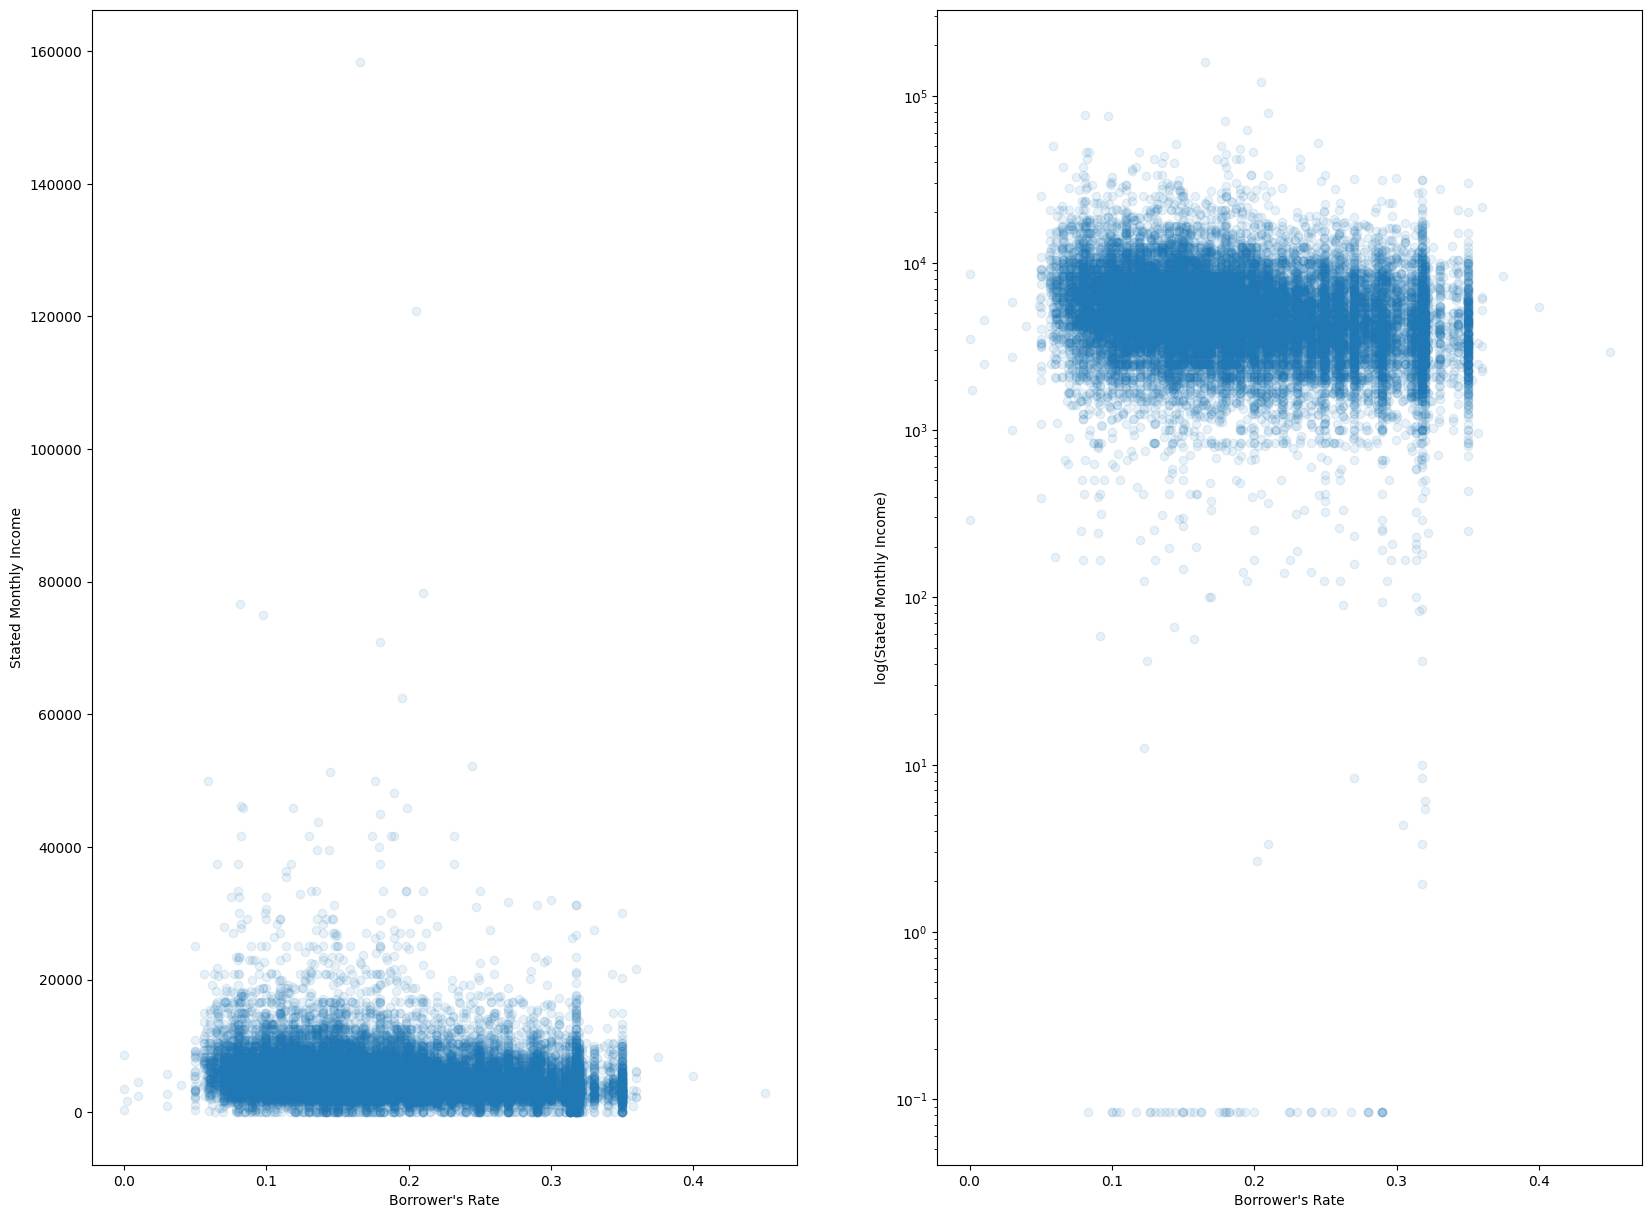

In [25]:
# Plotting two scatter plots with actual and transformed y-scale from a sample of 50000 observations.
plt.figure(figsize = [ 20,15])
plt.subplot(1,2,1)
plt.scatter(data = loan_data_subset, x =  'BorrowerRate', y = 'StatedMonthlyIncome', alpha = 1/10);
plt.xlabel("Borrower's Rate")
plt.ylabel('Stated Monthly Income');

plt.subplot(1,2,2)
plt.scatter(data = loan_data_subset, x = 'BorrowerRate', y = 'StatedMonthlyIncome', alpha = 1/10);
plt.xlabel("Borrower's Rate")
plt.yscale('log')
plt.ylabel('log(Stated Monthly Income)');

#### I plotted 50000 samples of the dataset on a normal y-axis and a log-transformed y-axis for the two variables. The second plot actually revealed that Standard monthly income and borrower's rate are highly negatively correlated between 0.2 to 0.3 borrower's rate at about 100000 standard monthly income.Outliers were observed below the zero line.

### What is the relationship between Proper Score and Borrower's rate/APR?

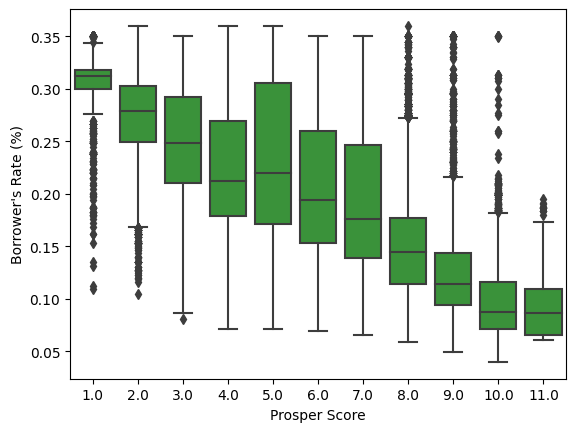

In [26]:
# choose color palette 
base_color = sb.color_palette()[2]
sb.boxplot(data= loan_data, x='ProsperScore', y='BorrowerRate', color=base_color);
plt.ylabel("Borrower's Rate (%)")
plt.xlabel('Prosper Score'); 

#### The plot shows strong correlation between the prosper rating with the borrower’s rate. On a general note, the borrower rate is highly correlated for Prosper's score between 3.0 and 8.0. From 8.0 to 11.0, the borrower's rate decreases.

### What is the relationship between Borrower's rating and Available BankCard Credit?

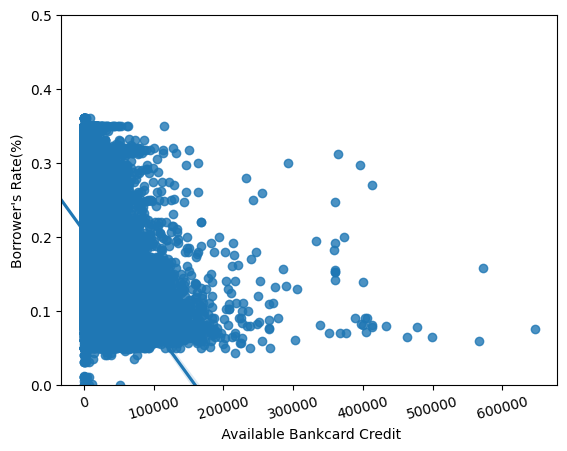

In [27]:
sb.regplot(data = loan_data, x = 'AvailableBankcardCredit', y = 'BorrowerRate', truncate=False, x_jitter=0.3)
plt.xlabel(' Available Bankcard Credit')
plt.ylabel("Borrower's Rate(%)")
plt.xticks(rotation = 15)
plt.ylim((0,0.5));

#### From the plot, the points are clustered at the bottom left corner. This suggest that when a borrower has relatively low credit amount (< about 25,000) the probabilities of getting low and high interest rates are similar. However, when the borrower’s credit amount is high (>about 50,000), he/she is more likely to get a lower interest


### What is the relationship between Employment Status and Listing Category? 

In [48]:
loan_update = loan_data.copy()
index_names = loan_update[ (loan_update.EmploymentStatus != 'Employed') & ( loan_update.EmploymentStatus != 'Retired') & (loan_update.EmploymentStatus != 'Not employed')].index
loan_update.drop(index_names, inplace = True)
loan_update.EmploymentStatus.value_counts()

Employed        67322
Not employed      835
Retired           795
Name: EmploymentStatus, dtype: int64

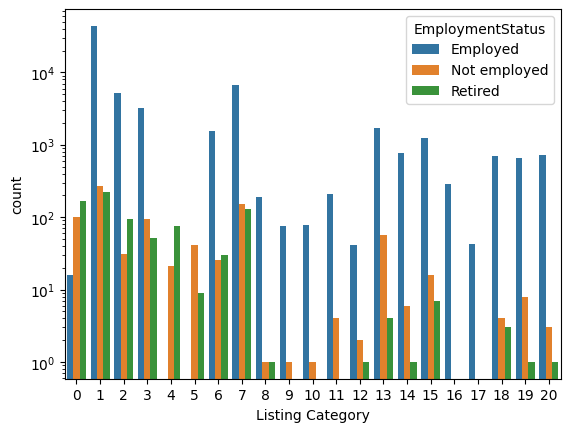

In [47]:
listing = ['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
ax=sb.countplot(data = loan_update, x = 'ListingCategory', hue = 'EmploymentStatus');
plt.yscale('log')
plt.xlabel('Listing Category');
# ax.set_xticklabels(listing,rotation = 45);

####  I filtered the dataframe by dropping some values in EmploymentStatus column such as : part-time, full-time, other, self-employed and not available. I plotted a clustered bar chart and discovered that borrowers who are employed got the highest count from listings 1 to to 20. The least count was for retired borrowers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For both the Borrower's rate and APR varaibles, the number of datapoint counts is highest where both variable intersect in the range 0.1 to 0.2. This shows great correlation in this range.

> I plotted 50000 samples of the dataset on a normal y-axis and a log-transformed y-axis for the Standard Monthly Income and borrower's rate variables. The second plot actually revealed that Standard monthly income and borrower's rate are highly negatively correlated between 0.2 to 0.3 borrower's rate at about 100000 standard monthly income.Outliers were observed below the zero line.

> The boxplot shows strong correlation between the prosper score and the borrower’s rate. On a general note, the borrower rate is highly correlated for Prosper's score between 3.0 and 8.0. From 8.0 to 11.0, the borrower's rate decreases.

> From the regplot between borrower's rate and Available card credit variables, the points are clustered at the bottom left corner. This suggest that when a borrower has relatively low credit amount (< about 25,000) the probabilities of getting low and high interest rates are similar. However, when the borrower’s credit amount is high (>about 50,000), he/she is more likely to get a lower interest


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I filtered the dataframe by dropping some values in EmploymentStatus column such as : part-time, full-time, other, self-employed and not available. I plotted a clustered bar chart and discovered that borrowers who are employed got the highest count from listings 1 to to 20; followed by borrowers who are not employed. The least count was for retired borrowers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [30]:
# dropping 'other' and 'Not available' columns
loan_data1 = loan_data.copy()
index_names = loan_data1[ ( loan_data1.EmploymentStatus != 'Retired') & (loan_data1.EmploymentStatus != 'Not employed')  & (loan_data1.EmploymentStatus != 'Full-time') & (loan_data1.EmploymentStatus != 'Part-time')   & (loan_data1.EmploymentStatus != 'Self-employed')].index
loan_data1.drop(index_names, inplace = True)
loan_data1.EmploymentStatus.value_counts()

Full-time        26355
Self-employed     6134
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [31]:
np.random.seed(2018)
sample1 = np.random.choice(loan_data1.shape[0],200,replace = False)
loan_data1_subset = loan_data1.iloc[sample1]
loan_data1_subset

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
56516,BD1A3390839291191E8660C,145401,2007-06-01,D,36,Completed,2010-06-22 00:00:00,0.10986,0.1008,0.0808,...,-31.11,0.0,0.00,0.00,0.0,1.0,0,0,0.00,2
106849,B1B034146050241381FE9F7,292784,2008-03-13,HR,36,Chargedoff,2009-12-25 00:00:00,0.26292,0.2400,0.2300,...,-11.54,0.0,673.12,673.12,0.0,1.0,0,0,0.00,8
67411,E5D334076622553056966D1,244554,2007-12-05,B,36,Completed,2009-01-27 00:00:00,0.14207,0.1350,0.1250,...,-90.49,0.0,0.00,0.00,0.0,1.0,0,0,0.00,190
46150,418033910774544394968A1,148306,2007-06-07,E,36,Completed,2010-06-18 00:00:00,0.23841,0.2234,0.2034,...,-130.08,0.0,0.00,0.00,0.0,1.0,0,0,0.00,172
34808,02A13601245487107D4B641,1163300,2014-01-25,NaN,60,Current,NaN,0.20321,0.1790,0.1690,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28107,FEF434607428719775629D5,421918,2009-08-27,NaN,36,Completed,2010-03-02 00:00:00,0.22338,0.2010,0.1910,...,-84.37,0.0,0.00,0.00,0.0,1.0,0,0,0.00,1024
59668,AABD3429540386691C421CB,390620,2008-08-30,D,36,Chargedoff,2011-02-09 00:00:00,0.19673,0.1747,0.1647,...,-14.51,0.0,407.25,407.22,0.0,1.0,1,0,0.00,55
58229,C7DE33930621882184CA94B,164520,2007-07-06,D,36,Completed,2008-02-12 00:00:00,0.24049,0.2330,0.2130,...,-32.59,0.0,0.00,0.00,0.0,1.0,1,0,0.00,91
24904,C4B0359955365852128D0C6,1108372,2014-01-14,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-3.40,0.0,0.00,0.00,0.0,1.0,0,0,0.00,1


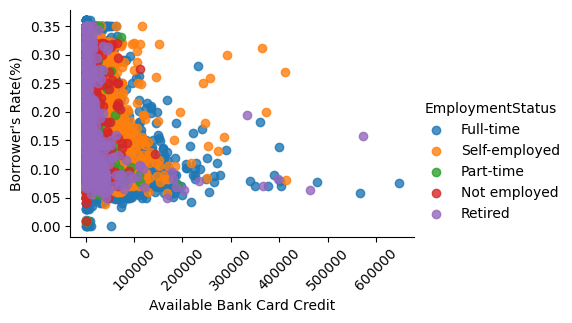

In [34]:
# A facet grid plot of the relationship between variable
g= sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
#plt.subplot(1,2,1)
#g = sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
g= g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate', fit_reg =  False, x_jitter = 0.6)
plt.xlabel('Available Bank Card Credit')
plt.ylabel("Borrower's Rate(%)")
plt.xticks(rotation = 45)
g.add_legend();

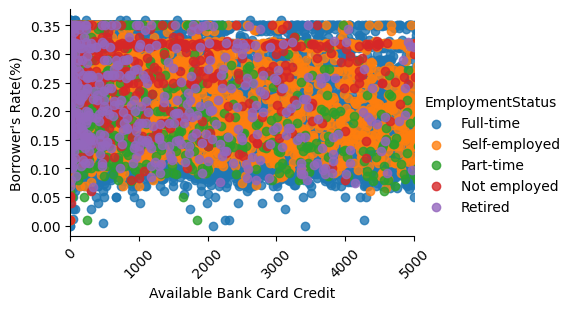

In [37]:
# Using xlim to view the distribution of data between credit amount 0 to 5000
g= sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
#plt.subplot(1,2,1)
#g = sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
g= g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate', fit_reg =  False, x_jitter = 0.5)
plt.xlabel('Available Bank Card Credit')
plt.ylabel("Borrower's Rate(%)")
plt.xticks(rotation = 45)
plt.xlim((0,5000))
g.add_legend();

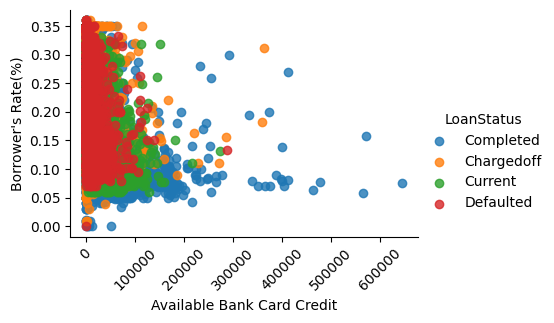

In [38]:
loan_data1.LoanStatus.value_counts()
# Using xlim to view the distribution of data between credit amount 0 to 5000
g= sb.FacetGrid(data = loan_data1, hue = 'LoanStatus', hue_order=['Completed','Chargedoff', 'Current','Defaulted'],aspect = 1.5)
#plt.subplot(1,2,1)
#g = sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
g= g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate', fit_reg =  False, x_jitter = 0.5)
plt.xlabel('Available Bank Card Credit')
plt.ylabel("Borrower's Rate(%)")
plt.xticks(rotation = 45)
#plt.xlim((0,5000))
g.add_legend();

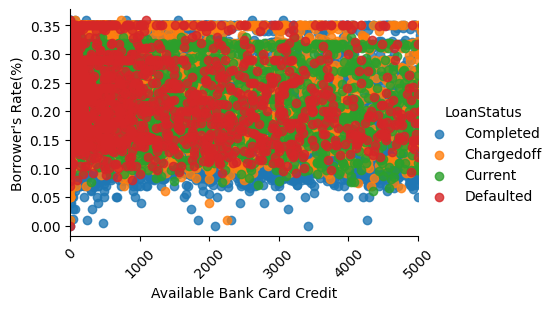

In [40]:
loan_data1.LoanStatus.value_counts()
# Using xlim to view the distribution of data between credit amount 0 to 5000
g= sb.FacetGrid(data = loan_data1, hue = 'LoanStatus', hue_order=['Completed','Chargedoff', 'Current','Defaulted'],aspect = 1.5)
#plt.subplot(1,2,1)
#g = sb.FacetGrid(data = loan_data1, hue = 'EmploymentStatus', hue_order=['Full-time','Self-employed', 'Part-time','Not employed', 'Retired'],aspect = 1.5)
g= g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate', fit_reg =  False, x_jitter = 0.5)
plt.xlabel('Available Bank Card Credit')
plt.ylabel("Borrower's Rate(%)")
plt.xticks(rotation = 45)
plt.xlim((0,5000))
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Majority of the borrowers whose available credit was below 100000 were unemployed,retired and part time workers.Self employed and full time borrowers have credits extending to up to 300000 dollars. Between credit limit 0 to 5000 dollars, borrowers across all employment status are represented.

> Majority of the borrowers whose available credit was below 100000 have their loan status as either being in default or charged off; while borrowers with loan status completed or current have their credit extending to 300000 dollars

### Were there any interesting or surprising interactions between features?

> The employment status of a borrower can be used to predict their loan Status.

## Conclusion 

> In this project I used the ProsperLoan dataset which comprises of 81
variables and 113,937 observations. With the help of the detailed description of the dataset can be found in a link in the READme file.I was able to isolate my variable of interest and performed the analysis.

> Firstly, I programmatically performed an assessment of the dataset to understand the structure and values of each column on the dataset. Functions like df.info(), df.shape, etc. was used in this phase.As a result, I chose  ‘BorrowerRate’ as my variable of interest since this is an important variable to both existing and potential borrower.

> The next step was to perform a visual exploration on the the distribution of variables that will support my investigation into the variable of interest. These variables include: CreditGrade, AvailableBankcardCredit, StatedMonthlyIncome, MonthlyLoanPayment,EmploymentStatus and LoanStatus. 

The following observations were made at the end of this phase:
* The count of BorrowerAPR values between 0.00 and 0.05 appeared to be nearly zero when plotted on a histogram compared to that of BorrowerRate which is above 10000 in the same  range.But transforming the count axis to a log scale reveals more about the count of BorrowerAPR in this range. BorrowerAPR variable observed to contain 25 missing value programmatically.
***
* The hisplot of the StandardMonthlyIncome variable is highly driven to the left of the axis.Using summary statistics I figured out the maximum count value to be 1750000, which could have caused an outlier or error in the plot. So I created a second visualization where the top 1% of the data were dropped from the original dataset inorder to obtained a more reasonable plot.
***
* The ListingCreationDate variable was converted to a datetime object in the format ‘yyyy-mm-dd’ to indicate the loan listing creation dates; and the column name of the ListingCategory varaible was changed from 'Listing category (numeric)' to a simple and easily accessible name: ListingCategory.

Following the univariate exploration of variables was the bivariate exploration where relationships between the variable of interest and some supported variables were established. 

The outcome of this phase is summarized as follows: 
* There was a high correlation between Borrower's rate and Borrower's APR varaibles in the range  0.1 to 0.2 percent. 
***
* Standard monthly income and borrower's rate are highly negatively correlated between 0.2 to 0.3 borrower's rate at about 100000 standard monthly income.Outliers were observed below the zero line.
***
* Borrower's rate is highly correlated with Prosper's score for Prosper's score between 3.0 and 8.0.
***
* When a borrower has relatively low credit amount (< about 25,000) the probabilities of getting low and high interest rates are similar. However, when the borrower’s credit amount is high (>about 50,000), he/she is more likely to get a lower interest.

Lastly, a multivariate exploration was performed on the dataset, and the following observations were made:
* Majority of the borrowers whose available credit were below 100000 were unemployed,retired and part time workers.Self employed and full time borrowers have credits extending to up to 300000 dollars. Between credit limit 0 to 5000 dollars, borrowers across all employment status are represented.
***
* Majority of the borrowers whose available credit were below 100000 have their loan status as either being in default or charged off; while borrowers with loan status completed or current have their credit extending to 300000 dollars.
***
* It was concluded that the employment status of a borrower can be used to predict their loan Status.


